# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [59]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code 
from inauguralproject import ExchangeEconomyClass
import matplotlib.pyplot as plt

maincolor = 'purple'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In order to find the pairs of combinations of $x_1^A$ and $x_2^A$ that are pareto-optimal relative to the initial allocation of goods, we utilize our contructed functions from ExchangeEconomyClass in order to go through and compare utilities gained in at the initial state with other possible combinations.



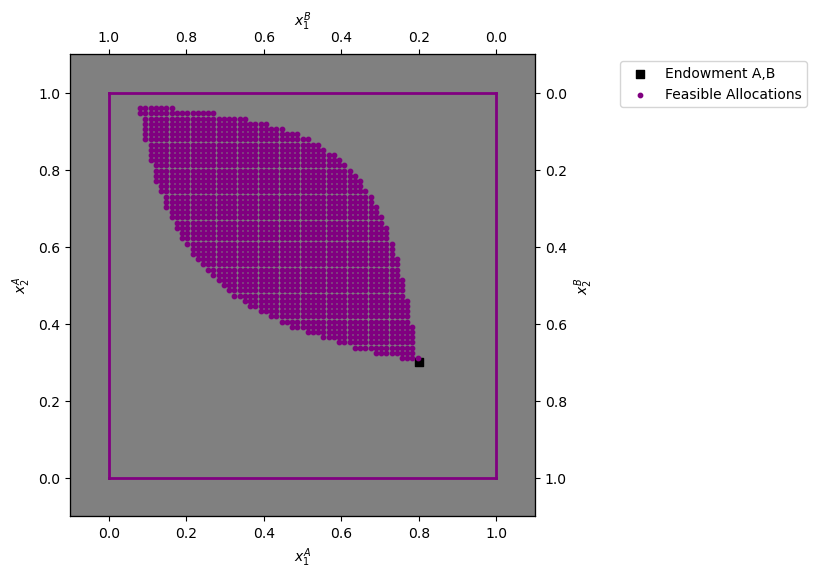

In [60]:

# Create an instance of the ExchangeEconomyClass
economy = ExchangeEconomyClass()

# Calculate utilities at initial endowments
par = economy.par
initial_utility_A = economy.utility_A(par.w1A, par.w2A)
initial_utility_B = economy.utility_B(1 - par.w1A, 1 - par.w2A)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# Define the number of points in the grid for each good (as specified, N=75)
N = 75
x1A_values = np.linspace(0, w1bar, N)
x2A_values = np.linspace(0, w2bar, N)

# Prepare to store feasible allocations
feasible_x1A = []
feasible_x2A = []

# Check each allocation in the grid
for x1A in x1A_values:
    for x2A in x2A_values:
        # Calculate the utility for both consumers at this allocation
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(w1bar - x1A, w2bar - x2A)

        # Check if both utilities are at least as high as with initial endowments
        if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
            feasible_x1A.append(x1A)
            feasible_x2A.append(x2A)

# Set up the figure and axes as provided in your code
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)

ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_facecolor('grey')
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Scatter plot for A's endowment point
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment A,B')
#ax_B.scatter(1-par.w1A, 1-par.w2A, marker='s', color='brown', label='Endowment B')  # Endowment B is the mirror of A's

# Plot the feasible allocations
ax_A.scatter(feasible_x1A, feasible_x2A, color=maincolor, s=10, label='Feasible Allocations')

# Draw the box representing the limits of the total endowment
ax_A.plot([0, w1bar], [0, 0], lw=2, color=maincolor)
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color=maincolor)
ax_A.plot([0, 0], [0, w2bar], lw=2, color=maincolor)
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color=maincolor)

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Show the plot
plt.show()


It is evident from the figure that the feasible allocation which are Pareto-optimal relative to the initial endowment is given by the purple "cigar" which lies north-west of the initial endowment which is marked with the black dot. 

# Question 2

In order to find the errors compared to the market clearing state for each price in the interval from (0.5;2.5), we make a for-loop for this range and for each price calculate these errors, store these errors in a list, which we then plot.

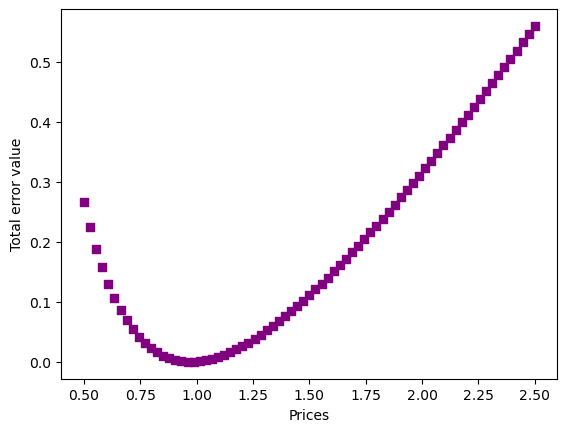

In [61]:
p_values = np.linspace(0.5, 2.5, N)
ErrorList = []

for price in p_values:
   error1, error2 = economy.check_market_clearing(price)
   total_error = error1+error2
   ErrorList.append(total_error)

plt.scatter(p_values, ErrorList, marker='s', color=maincolor)
plt.xlabel('Prices')
plt.ylabel('Total error value')
plt.show()


As evident from the figure, we notice a convex relationship between the erros and prices. Seemingly the errors are minimized around the range of (0.9;1)

# Question 3

In order to find the market-clearing price we simply look for the lowest value in our stored range of errors from the previous question. We then find the index in the list of this value and use it to attain the price that matches this error.

In [62]:
min_error = min(ErrorList)
min_error_index = ErrorList.index(min_error)
optimal_price = p_values[min_error_index]
print(f'The optimal price is: {optimal_price}')

The optimal price is: 0.9594594594594594


We see that the market clearing price is $\approx$ 0.955

# Question 4a

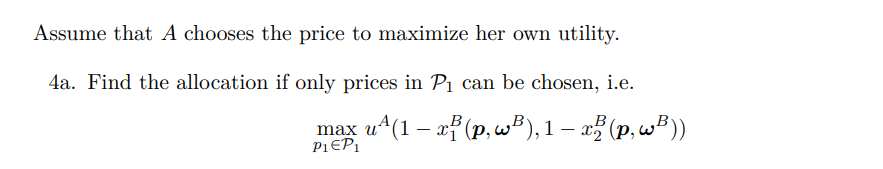

The chosen price will be: 1.9054054054054055
The allocation for A is: (0.6217494089834517, 0.6396396396396397)
The allocation for B is: (0.37825059101654834, 0.36036036036036034)


c:\Users\ander\OneDrive\Skrivebord\IntroProgOpgaver\projects-2024-anders-2-don-1\inauguralproject\inauguralproject.py:22: RuntimeWarning: invalid value encountered in scalar power
  return (x1A ** self.par.alpha) * (x2A ** (1 - self.par.alpha))


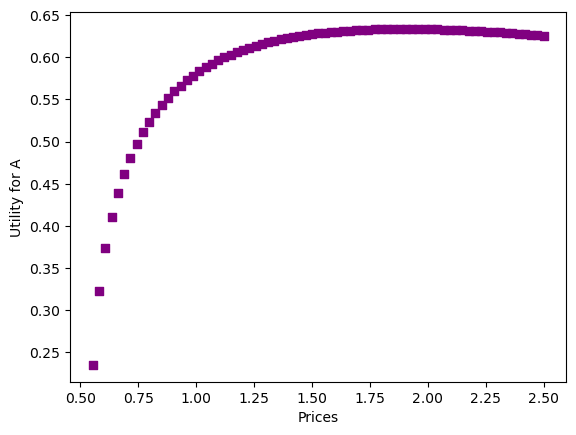

In [ ]:
p_values = np.linspace(0.5, 2.5, N)
utility_list_A = []

for price in p_values:
    x1B, x2B = economy.demand_B(price)
    x1A, x2A = 1-x1B, 1-x2B
    utilityA = economy.utility_A(x1A,x2A)
    utility_list_A.append(utilityA)



#Load the lists into numpy arrays
p_values_array = np.array(p_values)
utility_list_A_array = np.array(utility_list_A)


# Create a Bolean mask for elements that are not 'na' (numpy.nan)
feasible_utilities = ~np.isnan(utility_list_A_array)

# Apply the mask for our numpy arrays

filtered_utilities = utility_list_A_array[feasible_utilities]
filtered_p_values = p_values_array[feasible_utilities]

# Here we find the maximizing utility
max_utility_index = np.argmax(filtered_utilities)


optimal_price = filtered_p_values[max_utility_index]
Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
Allocation_x1A, Allocation_x2A = 1-Allocation_x1B, 1-Allocation_x2B

print(f'The chosen price will be: {optimal_price}')
print(f'The allocation for A is: ({Allocation_x1A}, {Allocation_x2A})')
print(f'The allocation for B is: ({Allocation_x1B}, {Allocation_x2B})')

#plt.scatter(p_values, utility_list_A, marker='s', color=maincolor)
#plt.xlabel('Prices')
#plt.ylabel('Utility for A')
#plt.show()


ADD CONCISE CONLUSION.